Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Wybrane przedmioty do plecaka:
- obraz-pejzaż (waga: 7 kg, wartość: 300 zł)
- obraz-portret (waga: 6 kg, wartość: 200 zł)
- laptop (waga: 5 kg, wartość: 500 zł)
- srebrne sztućce (waga: 1 kg, wartość: 100 zł)
- porcelana (waga: 3 kg, wartość: 250 zł)
- skórzana torebka (waga: 3 kg, wartość: 280 zł)

Całkowita wartość: 1630.0 zł
Całkowita waga: 25.0 kg


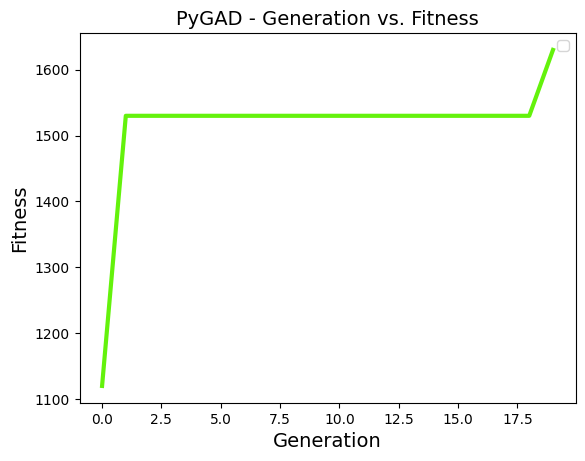

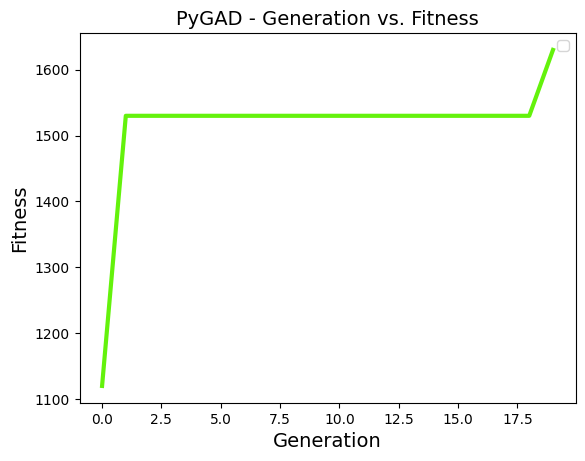

In [ ]:
import pygad 
import numpy
import time
 
przedmioty = [
    "zegar", "obraz-pejzaż", "obraz-portret", "radio", "laptop",
    "lampka nocna", "srebrne sztućce", "porcelana", "figura z brązu",
    "skórzana torebka", "odkurzacz"
]

wartosci = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
wagi     = [7,   7,   6,   2,  5,   6,  1,  3,   10,  3,   15]

limit_wagi = 25
najlepsza_mozliwa_wartosc = 1630 

def fitness_func(ga_instance, solution, solution_idx):
    total_waga = numpy.sum(solution * wagi)
    total_wartosc = numpy.sum(solution * wartosci)

    if total_waga > limit_wagi:
        return 0
    return total_wartosc

trafienia = 0
udane_czasy = []
max_proby = 100
# proby = 10

# for i in range(max_proby):
    # start = time.time()

ga_instance = pygad.GA(
    gene_space=[0, 1],
    num_generations=50, # Liczba pokoleń 50-100 Więcej = większa szansa na dobre rozwiązanie
    num_parents_mating=5, # 5–10 Wystarczy kilku do reprodukcji
    fitness_func=fitness_func,
    sol_per_pop=20, # Liczba chromosomów (rozwiązań) w jednej populacji 20-50
    num_genes=len(przedmioty),
    parent_selection_type="rank", #'tournament' Selekcja oparta na jakości
    keep_parents=2, # Elityzm – utrzymaj najlepszych
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10, #10-20 Pomaga unikać lokalnych minimów
    stop_criteria=["reach_1630"]
)
    # sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa 

ga_instance.run()
    # end = time.time()

    # _, solution_fitness, _ = ga_instance.best_solution()
    # czas = end - start

    # if solution_fitness == najlepsza_mozliwa_wartosc:
    #     trafienia += 1
    #     udane_czasy.append(czas)
    #     print(f"{trafienia}. Trafienie: {czas:.4f} sekundy")
    # # print(f"Uruchomienie {i+1}: wartość = {solution_fitness}")

    # if trafienia >= 10:
    #     break

# Średni czas
# sredni_czas = sum(udane_czasy) / len(udane_czasy)
# print(f"\n Średni czas znalezienia najlepszego rozwiązania (1630) = {sredni_czas:.4f} sekundy")

# -> Średni czas znalezienia najlepszego rozwiązania (1630) = 0.0278 sekundy

# Wynik w procentach
# procent = (trafienia / proby) * 100
# print(f"\nNajlepsze rozwiązanie (wartość 1630) znaleziono {trafienia} razy na {proby} prób.")
# print(f"Skuteczność: {procent:.1f}%")
# -> Skuteczność: 20.0%

# Wynik
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution)) 
print("Wybrane przedmioty do plecaka:")
for i in range(len(solution)):
    if solution[i] == 1:
        print(f"- {przedmioty[i]} (waga: {wagi[i]} kg, wartość: {wartosci[i]} zł)")

print(f"\nCałkowita wartość: {solution_fitness} zł")
print(f"Całkowita waga: {numpy.sum(solution * wagi)} kg")

# Wykres zmian wartości
ga_instance.plot_fitness()

# Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
# Wybrane przedmioty do plecaka:
# - obraz-pejzaż (waga: 7 kg, wartość: 300 zł)
# - obraz-portret (waga: 6 kg, wartość: 200 zł)
# - laptop (waga: 5 kg, wartość: 500 zł)
# - srebrne sztućce (waga: 1 kg, wartość: 100 zł)
# - porcelana (waga: 3 kg, wartość: 250 zł)
# - skórzana torebka (waga: 3 kg, wartość: 280 zł)

# Całkowita wartość: 1630.0 zł
# Całkowita waga: 25.0 kg

